# Import

In [1]:
def import_package(depth: int, is_jupyter: bool):
    if is_jupyter is False:
        current_dir = os.path.dirname(os.path.abspath(__file__))
    else:
        current_dir = os.getcwd()

    parent_dir = current_dir
    while depth > 0:
        depth -= 1
        parent_dir = os.path.dirname(parent_dir)
    print(current_dir)
    print(parent_dir)
    sys.path.insert(0, parent_dir)

import_package(1, True)

/Users/nguyenhuyhai/20212/blockchain_lab/HEALTH_TK/Indicator_correlation/Indicator/notebooks
/Users/nguyenhuyhai/20212/blockchain_lab/HEALTH_TK/Indicator_correlation/Indicator


In [2]:
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import sys
import seaborn as sns
import numpy as np
from indicator import *
from os import walk



In [3]:
pd.set_option('display.max_columns', None)


# Get data

In [4]:
df = pd.read_csv('/Users/nguyenhuyhai/20212/blockchain_lab/HEALTH_TK/Indicator_correlation/Indicator/data/new_data/BTCUSDT_5m_2022-01-01_2022-06-01.csv')

# Calculate indicators

In [5]:
def cal_indicator(df, is_sma: bool, is_ema: bool, is_bband: bool, is_adx: bool, is_kdj: bool, is_mom: bool, is_rsi: bool, is_wma: bool, is_stck: bool, is_stcd: bool,is_lwr: bool, is_ad: bool, is_cci: bool, begin: int, end: int, filename: str) -> indicator_set.IndicatorSet:
    # set up
    ins_set = IndicatorSet()
    ins_set.insert_data_frame(df[begin:end], [["high"],["low"],["close"], ["volumn"]], timestamp_column="open time", timestamp_unit='ms')
    # ins_set.generate_ohlc("close", "15T")

    # calculate indicator
    if is_sma:
        ins_set.insert_indicator(SMAIndicator(7), "sma7", ["close"], ["SMA 7"])
        ins_set.insert_indicator(SMAIndicator(25), "sma25", ["close"], ["SMA 25"])
        ins_set.insert_indicator(SMAIndicator(99), "sma99", ["close"], ["SMA 99"])

    if is_ema:
        ins_set.insert_indicator(EMAIndicator(7), "ema7", ["close"], ["EMA 7"])
        ins_set.insert_indicator(EMAIndicator(25), "ema25", ["close"], ["EMA 25"])
        ins_set.insert_indicator(EMAIndicator(99), "ema99", ["close"], ["EMA 99"])

    if is_bband:
        ins_set.insert_indicator(BBANDSIndicator(10), "bollingers", ["close"], ["bband upper", "bband middle", "bband lower"])

    if is_adx:
        ins_set.insert_indicator(ADXIndicator(14), "adx14", ["high", "low", "close"], ["ADX 14"])

    if is_kdj:
        ins_set.insert_indicator(KDJIndicator(), "kdj", ["high", "low", "close"], ["K", "D", "J"])

    if is_mom:
        ins_set.insert_indicator(MOMIndicator(7), "mom7", ["close"], ["MOM 7"])
        ins_set.insert_indicator(MOMIndicator(25), "mom25", ["close"], ["MOM 25"])
        ins_set.insert_indicator(MOMIndicator(99), "mom99", ["close"], ["MOM 99"])

    if is_wma:
        ins_set.insert_indicator(WMAIndicator(7), "wma7", ["close"], ["WMA 7"])
        ins_set.insert_indicator(WMAIndicator(25), "wma25", ["close"], ["WMA 25"])
        ins_set.insert_indicator(WMAIndicator(99), "wma99", ["close"], ["WMA 99"])

    if is_rsi:
        ins_set.insert_indicator(RSIIndicator(6), "rsi6", ["close"], ["RSI 6"])
        ins_set.insert_indicator(RSIIndicator(12), "rsi12", ["close"], ["RSI 12"])
        ins_set.insert_indicator(RSIIndicator(24), "rsi24", ["close"], ["RSI 24"])

    if is_stck:
        ins_set.insert_indicator(STCKIndicator(10), "stck10", ["high", "low", "close"], ["STCK 10"])

    if is_stcd:
        ins_set.insert_indicator(STCDIndicator(7), "stcd7", ["STCK 10"], ["STCD 7"])
    
    if is_lwr:
        ins_set.insert_indicator(LWRIndicator(14), "lwr14", ["high", "low", "close"], ["LWR 14"])

    if is_ad:
        ins_set.insert_indicator(ADIndicator(), "AD", ["high", "low", "close", "volumn"], ["AD"])
    
    if is_cci:
        ins_set.insert_indicator(CCIIndicator(14), "cci14", ["high", "low", "close"], ["CCI 14"])






        

    ins_set.calculate()

    return ins_set

# Extract optimal set

In [6]:
def to_dataframe(ins_set: indicator_set) -> df:
    ins_set.to_csv("origin.csv")
    df = pd.read_csv("origin.csv")[200:]
    # df.drop('high', axis =1 , inplace= True)
    
    # df.drop('low', axis =1 , inplace= True)
    # df.drop('close', axis =1 , inplace= True)
    df.to_csv('newdata')
    return df


In [7]:
def plot(cor, title) -> list:
    f, ax = plt.subplots(figsize = (12,10))


    cmap = sns.diverging_palette(230, 20, as_cmap = True)

    sns.heatmap(cor, annot = True, cmap = cmap)
    ax.set_title(title)

# Main


In [8]:
answ = cal_indicator(df, True, True, True, True, True, True, True, True, True, True, True, True, True, len(df) - 1500, len(df), df)
# answ.to_csv("testt.csv")


df1 = to_dataframe(answ)
df1.drop('high', axis =1 , inplace= True)
    
df1.drop('low', axis =1 , inplace= True)

df1.drop('close', axis =1 , inplace= True)

df1.drop('volumn', axis = 1, inplace = True)

#plot(df1.corr())
# dff = pd.read_csv(answ.to_csv())
# dff


In [9]:
df1

,open time,SMA 7,SMA 25,SMA 99,EMA 7,EMA 25,EMA 99,bband upper,bband middle,bband lower,ADX 14,K,D,J,MOM 7,MOM 25,MOM 99,WMA 7,WMA 25,WMA 99,RSI 6,RSI 12,RSI 24,STCK 10,STCD 7,LWR 14,AD,CCI 14
200,2022-05-28 11:40:00,28882.514286,28826.8840,28839.224242,28868.770017,28844.790463,28826.015833,28939.716222,28859.746,28779.775778,15.983914,64.572507,68.094605,57.528311,35.70,60.56,170.44,28878.953571,28843.429754,28842.737552,52.095806,53.861196,52.647359,56.886069,75.167463,-43.113931,1815.385053,53.134444
201,2022-05-28 11:45:00,28878.151429,28829.4748,28840.468687,28864.645013,28845.365812,28826.540916,28936.069329,28864.483,28792.896671,15.755041,58.415709,64.868306,45.510515,-30.54,64.77,123.20,28871.392500,28845.382523,28842.998467,47.019639,51.189500,51.295045,48.096749,68.508314,-51.903251,1748.271291,29.835156
202,2022-05-28 11:50:00,28874.700000,28831.2400,28841.754040,28859.943760,28845.402288,28826.926898,28921.496249,28870.558,28819.619751,15.301454,47.547083,59.094565,24.452119,-24.16,44.13,127.25,28863.314643,28846.641385,28843.105893,44.503866,49.884458,50.638859,41.689542,62.611364,-56.152524,1695.997312,-2.780236
203,2022-05-28 11:55:00,28861.674286,28831.9236,28842.159596,28851.962820,28844.065189,28826.948760,28921.910904,28870.373,28818.835096,14.232438,32.303016,50.164049,-3.419049,-91.18,17.09,40.15,28851.644643,28846.393692,28842.831212,37.781142,46.314634,48.832351,10.250589,50.886089,-67.928892,1650.356553,-45.860228
204,2022-05-28 12:00:00,28853.828571,28833.7304,28842.341414,28851.469615,28844.520943,28827.409585,28919.219538,28867.091,28814.962462,13.665824,31.019527,43.782542,5.493499,-54.92,45.17,18.00,28848.723571,28847.783415,28842.987820,49.146262,51.028091,51.077624,28.452550,43.110174,-53.409992,1705.426868,-27.848159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2022-06-01 23:35:00,29907.702857,29739.8556,30082.293434,29870.712650,29801.756408,30145.403098,30043.135105,29863.389,29683.642895,26.966745,51.349060,60.706813,32.633553,76.99,184.24,-1106.64,29889.188929,29794.544985,29904.415125,53.821103,55.440125,50.453657,42.192607,57.855655,-49.226780,7677.678472,29.686437
1496,2022-06-01 23:40:00,29874.795714,29745.9576,30071.265859,29859.729488,29803.681300,30139.030636,30035.103035,29871.891,29708.678965,25.532771,43.667922,55.027183,20.949402,-230.35,152.55,-1091.73,29868.958214,29801.231477,29899.304857,47.027579,51.862952,48.810224,29.197455,48.296535,-59.043110,7602.731312,12.391025
1497,2022-06-01 23:45:00,29864.532857,29750.7520,30061.135051,29855.677116,29806.745815,30133.120423,30024.235076,29881.527,29738.818924,23.850216,35.476803,48.510389,9.409630,-71.84,119.86,-1002.95,29861.139286,29808.736277,29894.749939,50.094472,53.199490,49.506536,33.141702,43.962295,-57.909619,7713.209549,-5.001349
1498,2022-06-01 23:50:00,29862.160000,29755.9388,30050.598788,29840.965337,29805.983060,30126.394615,30023.382232,29882.105,29740.827768,22.195988,25.942116,40.987632,-4.148916,-16.61,129.67,-1043.09,29844.213571,29812.280738,29889.463838,41.963065,49.055257,47.621265,6.460835,39.487683,-77.702344,7643.009982,-40.758424


## Group 1

In [10]:
group1 = ["SMA 7", "SMA 25", "SMA 99", "EMA 7", "EMA 25", "EMA 99", "bband upper", "bband middle",	"bband lower", "MOM 7",	"MOM 25", "MOM 99", "WMA 7", "WMA 25", "WMA 99", "RSI 6", "RSI 12", "RSI 24"]

In [11]:
#pearson correlation

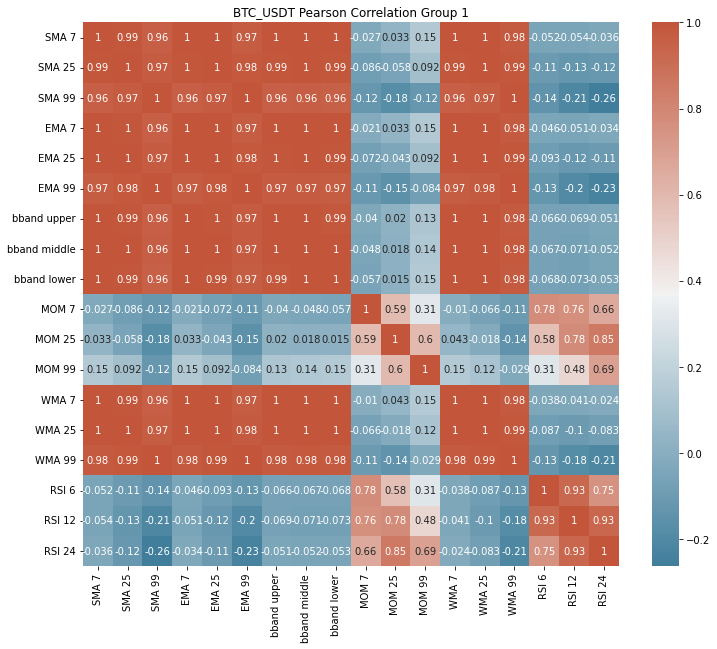

In [12]:
plot(df1[group1].corr(method='pearson'), 'BTC_USDT Pearson Correlation Group 1')

In [13]:
#spearman correlation

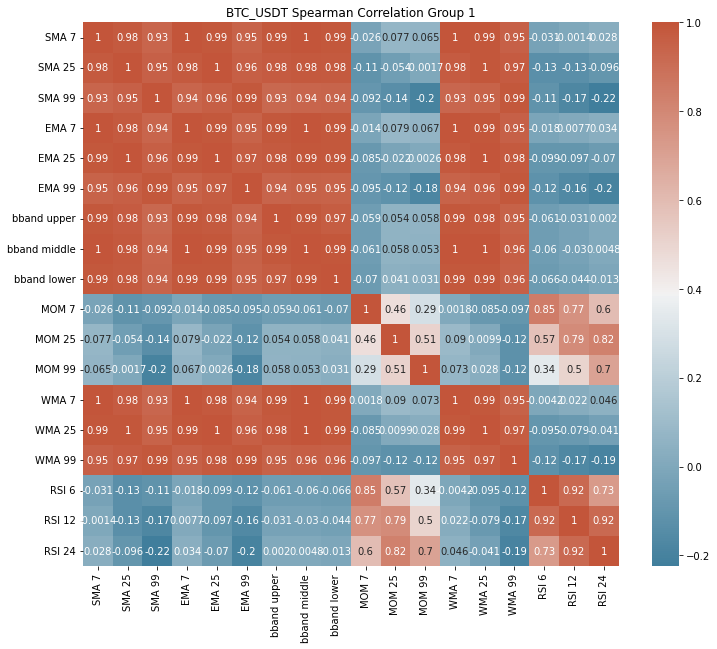

In [14]:
plot(df1[group1].corr(method='spearman'), 'BTC_USDT Spearman Correlation Group 1')

In [15]:
#kendall correlation

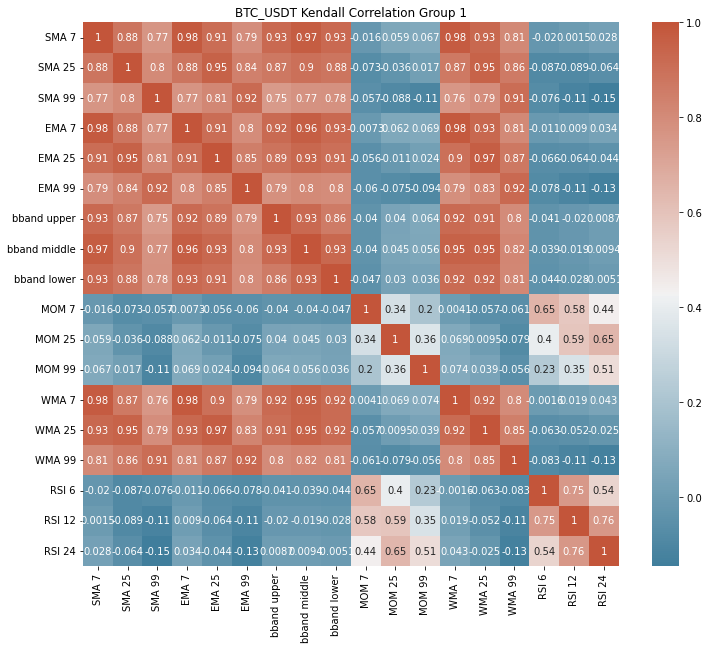

In [16]:
plot(df1[group1].corr(method='kendall'), 'BTC_USDT Kendall Correlation Group 1')

## Group 2

In [17]:
group2 = ['ADX 14', 'K', 'D', 'J', 'STCK 10', 'STCD 7', 'LWR 14', 'AD', 'CCI 14']


    

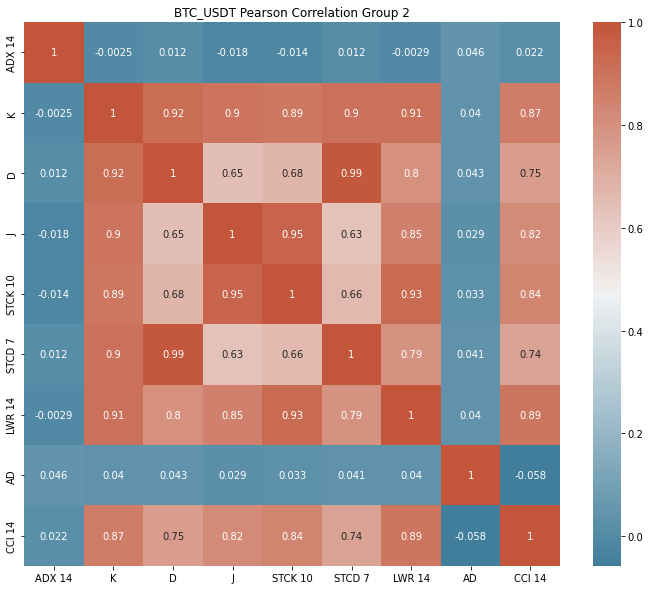

In [18]:
plot(df1[group2].corr(method='pearson'), 'BTC_USDT Pearson Correlation Group 2') #pearson

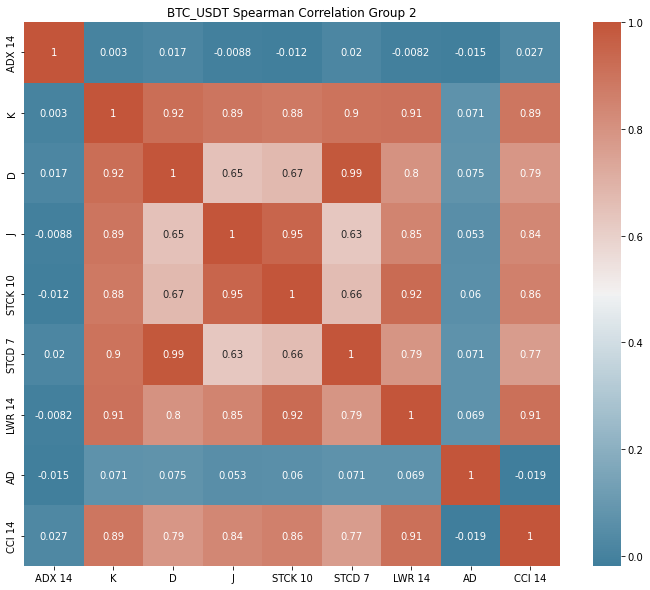

In [19]:
plot(df1[group2].corr(method='spearman'), 'BTC_USDT Spearman Correlation Group 2') #spearman

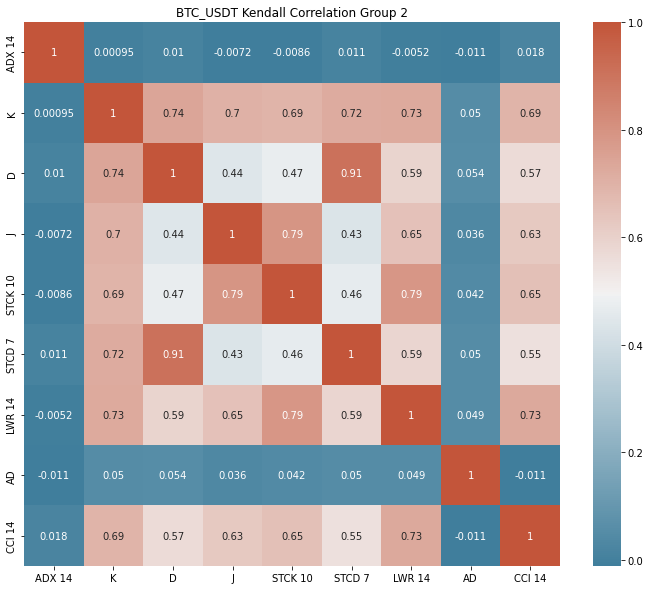

In [20]:
plot(df1[group2].corr(method='kendall'), 'BTC_USDT Kendall Correlation Group 2') #kendall

### SU corr

In [21]:
! pip install skfeature-chappers


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


#### Turn data to discrete

In [22]:
# convert a list continuous data to discrete data
df2 = to_dataframe(answ)

df2.drop('high', axis =1 , inplace= True)
    
df2.drop('low', axis =1 , inplace= True)

def toDiscreteColumn(minVal, maxVal, bins):
    period = (maxVal - minVal)/bins
    range_list = list(minVal + i*period for i in range(bins + 1))
    range_list = [round(elem, 3) for elem in range_list]
    return range_list

# JUST EXAMPLE TO SEE HOW FUNCTION WORKS
print("Show example of discrete data:")
toDiscreteColumn(df2.close.min(), df2.close.max(), 10)

Show example of discrete data:


[28795.78,
 29146.298,
 29496.816,
 29847.334,
 30197.852,
 30548.37,
 30898.888,
 31249.406,
 31599.924,
 31950.442,
 32300.96]

In [23]:
def toDiscrete(df_new, featureList):
    for item in featureList:
        column = df_new[item]
        bins = toDiscreteColumn(column.min(), column.max(), 10)
        column = pd.cut(column, bins = bins, labels=[f'[{bins[i]},{bins[i+1]}]' for i in range(len(bins)-1)])
        df_new[item] = column
    df_new.to_csv("new_discrete.csv")
    return df_new

# YOU CAN MODIFY THE FEATURE LIST TO YOUR NEEDS
fetureList = list(df2.columns)
fetureList.remove('open time')
df_new = toDiscrete(df2, fetureList)
df_new.drop('close', axis = 1, inplace = True)
df_new.drop('open time', axis =1, inplace = True)
df_new.drop('volumn', axis = 1, inplace = True)

In [24]:
df_new

,SMA 7,SMA 25,SMA 99,EMA 7,EMA 25,EMA 99,bband upper,bband middle,bband lower,ADX 14,K,D,J,MOM 7,MOM 25,MOM 99,WMA 7,WMA 25,WMA 99,RSI 6,RSI 12,RSI 24,STCK 10,STCD 7,LWR 14,AD,CCI 14
200,"[28836.96,29172.436]",NaN,"[28839.224,29142.233]","[28836.064,29169.545]","[28840.713,29161.225]",NaN,"[28890.319,29240.477]","[28845.94,29178.513]",NaN,"[15.068,21.104]","[58.338,67.183]","[66.007,74.092]","[48.549,62.394]","[-66.552,66.625]","[33.965,266.496]","[59.984,435.663]","[28831.799,29169.314]",NaN,"[28842.077,29145.756]","[43.068,52.157]","[46.259,54.042]","[47.199,53.43]","[50.0,60.0]","[75.105,83.763]","[-50.0,-40.0]","[1537.505,2410.107]","[-16.228,57.507]"
201,"[28836.96,29172.436]","[28826.884,29153.778]","[28839.224,29142.233]","[28836.064,29169.545]","[28840.713,29161.225]","[28826.016,29127.855]","[28890.319,29240.477]","[28845.94,29178.513]","[28779.776,29106.241]","[15.068,21.104]","[58.338,67.183]","[57.921,66.007]","[34.704,48.549]","[-66.552,66.625]","[33.965,266.496]","[59.984,435.663]","[28831.799,29169.314]","[28843.43,29167.383]","[28842.077,29145.756]","[43.068,52.157]","[46.259,54.042]","[47.199,53.43]","[40.0,50.0]","[66.448,75.105]","[-60.0,-50.0]","[1537.505,2410.107]","[-16.228,57.507]"
202,"[28836.96,29172.436]","[28826.884,29153.778]","[28839.224,29142.233]","[28836.064,29169.545]","[28840.713,29161.225]","[28826.016,29127.855]","[28890.319,29240.477]","[28845.94,29178.513]","[28779.776,29106.241]","[15.068,21.104]","[40.649,49.494]","[57.921,66.007]","[20.86,34.704]","[-66.552,66.625]","[33.965,266.496]","[59.984,435.663]","[28831.799,29169.314]","[28843.43,29167.383]","[28842.077,29145.756]","[43.068,52.157]","[46.259,54.042]","[47.199,53.43]","[40.0,50.0]","[57.79,66.448]","[-60.0,-50.0]","[1537.505,2410.107]","[-16.228,57.507]"
203,"[28836.96,29172.436]","[28826.884,29153.778]","[28839.224,29142.233]","[28836.064,29169.545]","[28840.713,29161.225]","[28826.016,29127.855]","[28890.319,29240.477]","[28845.94,29178.513]","[28779.776,29106.241]","[9.032,15.068]","[31.804,40.649]","[49.836,57.921]","[-6.83,7.015]","[-199.729,-66.552]","[-198.566,33.965]","[-315.695,59.984]","[28831.799,29169.314]","[28843.43,29167.383]","[28842.077,29145.756]","[33.979,43.068]","[46.259,54.042]","[47.199,53.43]","[10.0,20.0]","[49.132,57.79]","[-70.0,-60.0]","[1537.505,2410.107]","[-89.962,-16.228]"
204,"[28836.96,29172.436]","[28826.884,29153.778]","[28839.224,29142.233]","[28836.064,29169.545]","[28840.713,29161.225]","[28826.016,29127.855]","[28890.319,29240.477]","[28845.94,29178.513]","[28779.776,29106.241]","[9.032,15.068]","[22.96,31.804]","[41.751,49.836]","[-6.83,7.015]","[-66.552,66.625]","[33.965,266.496]","[-315.695,59.984]","[28831.799,29169.314]","[28843.43,29167.383]","[28842.077,29145.756]","[43.068,52.157]","[46.259,54.042]","[47.199,53.43]","[20.0,30.0]","[40.474,49.132]","[-60.0,-50.0]","[1537.505,2410.107]","[-89.962,-16.228]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,"[29843.387,30178.863]","[29480.673,29807.567]","[30051.261,30354.27]","[29836.507,30169.989]","[29481.738,29802.251]","[30033.372,30335.211]","[29940.793,30290.951]","[29843.658,30176.231]","[29432.706,29759.171]","[21.104,27.14]","[49.494,58.338]","[57.921,66.007]","[20.86,34.704]","[66.625,199.802]","[33.965,266.496]","[-1442.732,-1067.053]","[29844.345,30181.86]","[29491.337,29815.29]","[29753.113,30056.792]","[52.157,61.246]","[54.042,61.825]","[47.199,53.43]","[40.0,50.0]","[57.79,66.448]","[-50.0,-40.0]","[7645.722,8518.325]","[-16.228,57.507]"
1496,"[29843.387,30178.863]","[29480.673,29807.567]","[30051.261,30354.27]","[29836.507,30169.989]","[29802.251,30122.763]","[30033.372,30335.211]","[29940.793,30290.951]","[29843.658,30176.231]","[29432.706,29759.171]","[21.104,27.14]","[40.649,49.494]","[49.836,57.921]","[20.86,34.704]","[-332.906,-199.729]","[33.965,266.496]","[-1442.732,-1067.053]","[29844.345,30181.86]","[29491.337,29815.29]","[29753.113,30056.792]"

In [25]:
##CHeck NAN

In [26]:
for i in range(len(df_new.columns)): #Check the percetntage of Nan
    missing_data = df_new[df_new.columns[i]].isna().sum()
    perc = missing_data / len(df_new[df_new.columns[i]]) * 100
    print(str(df_new.columns[i])+' has missing entries: %d, which is %.2f percent of total' % (missing_data, perc))

SMA 7 has missing entries: 2, which is 0.15 percent of total
SMA 25 has missing entries: 2, which is 0.15 percent of total
SMA 99 has missing entries: 1, which is 0.08 percent of total
EMA 7 has missing entries: 2, which is 0.15 percent of total
EMA 25 has missing entries: 1, which is 0.08 percent of total
EMA 99 has missing entries: 2, which is 0.15 percent of total
bband upper has missing entries: 1, which is 0.08 percent of total
bband middle has missing entries: 1, which is 0.08 percent of total
bband lower has missing entries: 2, which is 0.15 percent of total
ADX 14 has missing entries: 1, which is 0.08 percent of total
K has missing entries: 0, which is 0.00 percent of total
D has missing entries: 2, which is 0.15 percent of total
J has missing entries: 1, which is 0.08 percent of total
MOM 7 has missing entries: 1, which is 0.08 percent of total
MOM 25 has missing entries: 0, which is 0.00 percent of total
MOM 99 has missing entries: 2, which is 0.15 percent of total
WMA 7 has 

In [27]:
import skfeature.utility.entropy_estimators as ee


def information_gain(data1, data2):
    """
    Function calculates the information gain, where IG(data1,data2) = H(data1) - H(data1|data2)
    Input
    -----
    data1: {numpy array}, shape (n_samples,)
    data2: {numpy array}, shape (n_samples,)
    Output
    ------
    IG: {float}
        IG: information gain of data1, data2
    """

    ig = ee.entropyd(data1) - conditional_entropy(data1, data2)
    return ig


def conditional_entropy(data1, data2):
    """
    Function calculates the conditional entropy, where ce = H(data1) - I(data1;data2)
    Input:
    -------------------------------------
    data1: {numpy array}, shape (n_samples,)
    data2: {numpy array}, shape (n_samples,)
    Output
    -------------------------------------
    ce: {float}
        ce: Conditional entropy of data1 and data2
    """

    ce = ee.entropyd(data1) - ee.midd(data1, data2)
    return ce


def su_calculation(data1, data2):
    """
    Function calculates the symmetrical uncertainty, where su(data1,data2) = 2*IG(data1,data2)/(H(data1)+H(data2))
    Input
    -------------------------------------
    data1: {numpy array}, shape (n_samples,)
    data2: {numpy array}, shape (n_samples,)
    Output
    -------------------------------------
    su: {float}
        su: Symmetrical uncertainty of data1 and data2
    """

    # calculate information gain of data1 and data2, t1 = ig(data1,data2)
    t1 = information_gain(data1, data2)
    # calculate entropy of data1, t2 = H(data1)
    t2 = ee.entropyd(data1)
    # calculate entropy of data2, t3 = H(data2)
    t3 = ee.entropyd(data2)
    # su(data1,data2) = 2*t1/(t2+t3)
    su = 2.0*t1/(t2+t3)

    return su

#### Group1

In [28]:
df_new1 = df_new[group1]

In [29]:
columns = df_new1.columns
matrix1=[] #define empty matrix
for i in columns: 
    row=[] 
    for j in columns: 
        a = su_calculation(df_new1[i], df_new1[j])
        row.append(a) #adding a value for each column for this row
    matrix1.append(row) #add fully defined column into the row


In [30]:
df_final1 = pd.DataFrame(matrix1, columns =df_new1.columns, index= df_new1.columns)
df_final1 


,SMA 7,SMA 25,SMA 99,EMA 7,EMA 25,EMA 99,bband upper,bband middle,bband lower,MOM 7,MOM 25,MOM 99,WMA 7,WMA 25,WMA 99,RSI 6,RSI 12,RSI 24
SMA 7,1.000000,0.763897,0.626338,0.911892,0.779321,0.658080,0.785912,0.895198,0.811221,0.083116,0.146725,0.282485,0.902934,0.819663,0.680548,0.030422,0.067534,0.130005
SMA 25,0.763897,1.000000,0.698119,0.777349,0.901845,0.730234,0.749980,0.806081,0.765779,0.085396,0.158708,0.281550,0.740595,0.877489,0.740312,0.040223,0.078517,0.139223
SMA 99,0.626338,0.698119,1.000000,0.637907,0.688584,0.860105,0.606202,0.642403,0.641826,0.070786,0.142058,0.320126,0.617458,0.666795,0.809600,0.037170,0.079239,0.133512
EMA 7,0.911892,0.777349,0.637907,1.000000,0.786634,0.667307,0.795947,0.899332,0.822254,0.092318,0.157718,0.289091,0.911210,0.828109,0.688115,0.033746,0.076616,0.142674
EMA 25,0.779321,0.901845,0.688584,0.786634,1.000000,0.730443,0.765625,0.807711,0.757874,0.086917,0.157284,0.288822,0.760374,0.874605,0.741665,0.039797,0.076813,0.136429
EMA 99,0.658080,0.730234,0.860105,0.667307,0.730443,1.000000,0.642383,0.670738,0.674114,0.073208,0.142128,0.351954,0.651409,0.704489,0.860011,0.038814,0.078577,0.153469
bband upper,0.785912,0.749980,0.606202,0.795947,0.765625,0.642383,1.000000,0.803924,0.707658,0.086469,0.158120,0.273666,0.779817,0.794420,0.663922,0.032965,0.060162,0.122082
bband middle,0.895198,0.806081,0.642403,0.899332,0.807711,0.670738,0.803924,1.000000,0.829001,0.090676,0.149558,0.281569,0.847257,0.862045,0.691654,0.038000,0.070357,0.134473
bband lower,0.811221,0.765779,0.641826,0.822254,0.757874,0.674114,0.707658,0.829001,1.000000,0.083617,0.130490,0.270479,0.803763,0.802625,0.683983,0.031414,0.063714,0.128983
MOM 7,0.083116,0.085396,0.070786,0.092318,0.086917,0.073208,0.086469,0.090676,0.083617,1.000000,0.164982,0.104868,0.086507,0.087010,0.081781,0.266103,0.258119,0.182679


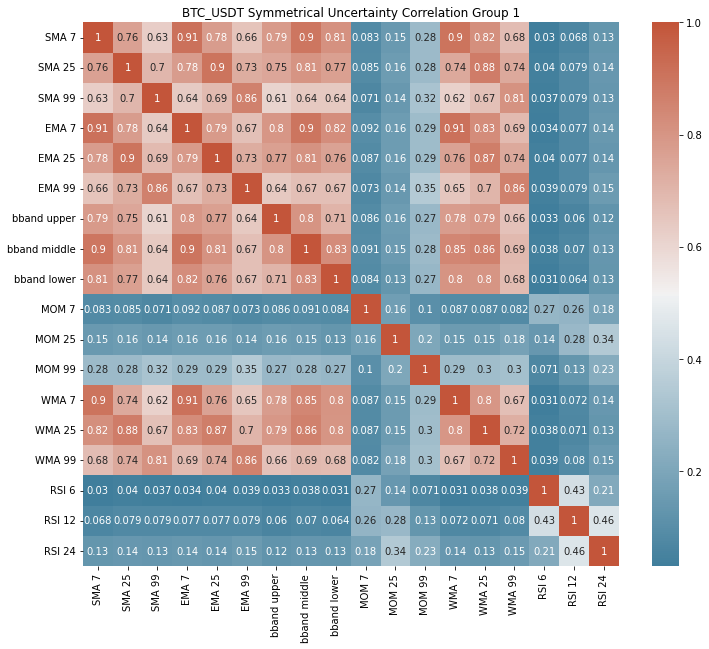

In [31]:
plot(df_final1, 'BTC_USDT Symmetrical Uncertainty Correlation Group 1')

#### Group2

In [32]:
df_new2 = df_new[group2]

In [33]:
columns = df_new2.columns
matrix2=[] #define empty matrix
for i in columns: 
    row=[] 
    for j in columns: 
        a = su_calculation(df_new2[i], df_new2[j])
        row.append(a) #adding a value for each column for this row
    matrix2.append(row) #add fully defined column into the row


In [34]:
df_final2 = pd.DataFrame(matrix2, columns =df_new2.columns, index= df_new2.columns)
df_final2 


,ADX 14,K,D,J,STCK 10,STCD 7,LWR 14,AD,CCI 14
ADX 14,1.000000,0.034995,0.048524,0.032390,0.024044,0.039384,0.024140,0.120142,0.020291
K,0.034995,1.000000,0.377593,0.338803,0.314144,0.359226,0.348154,0.031818,0.336848
D,0.048524,0.377593,1.000000,0.144246,0.144917,0.662354,0.216757,0.049066,0.241018
J,0.032390,0.338803,0.144246,1.000000,0.433338,0.142030,0.269378,0.024977,0.250046
STCK 10,0.024044,0.314144,0.144917,0.433338,1.000000,0.143295,0.470272,0.023090,0.274132
STCD 7,0.039384,0.359226,0.662354,0.142030,0.143295,1.000000,0.213791,0.042060,0.224563
LWR 14,0.024140,0.348154,0.216757,0.269378,0.470272,0.213791,1.000000,0.030910,0.364621
AD,0.120142,0.031818,0.049066,0.024977,0.023090,0.042060,0.030910,1.000000,0.038271
CCI 14,0.020291,0.336848,0.241018,0.250046,0.274132,0.224563,0.364621,0.038271,1.000000


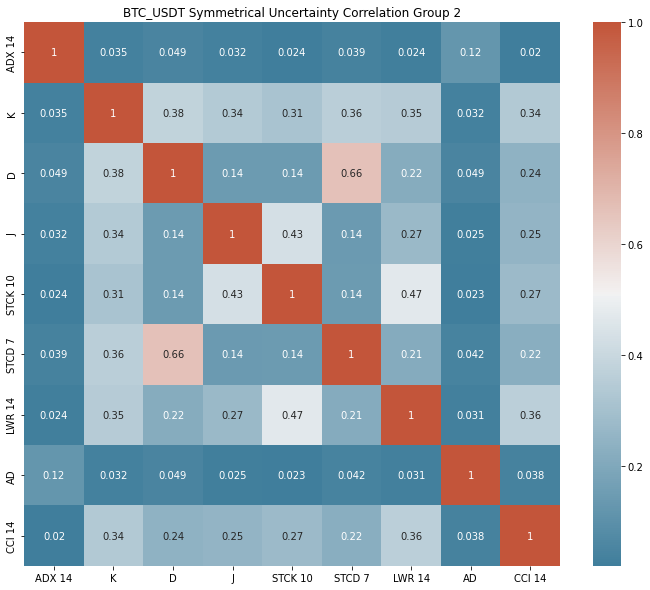

In [35]:
plot(df_final2, 'BTC_USDT Symmetrical Uncertainty Correlation Group 2')